In [1]:
library(dplyr)
library(ggplot2)
library(stringr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# **scatter plot and compare all tissue coefs**

In [2]:
tmp_file_path = "../../../"

In [127]:
# args = commandArgs(trailingOnly=TRUE)
# tissue = args[1]
# tissue_predOn = args[2]
# model_name = args[3]
tissue = "germline"
tissue_predOn = "blood"
model_name = "model3"


#reading in data
if (tissue_predOn =="liver"){ #oif conditional as different files to compare to liver 
    tissue_coefs <- read.csv(paste(tmp_file_path,"data/",tissue,"/dataframes/",model_name,"/",tissue,"_onLiver_coefDF_bootstrap.csv",sep=""))
}else{tissue_coefs <- read.csv(paste(tmp_file_path,"data/",tissue,"/dataframes/",model_name,"/",tissue,"_coefDF_bootstrap.csv",sep=""))}
if (tissue=="liver"){
   tissue_predOn_coefs <- read.csv(paste(tmp_file_path,"data/",tissue_predOn,"/dataframes/",model_name,"/",tissue_predOn,"_onLiver_coefDF_bootstrap.csv",sep=""))
}else{tissue_predOn_coefs <- read.csv(paste(tmp_file_path,"data/",tissue_predOn,"/dataframes/",model_name,"/",tissue_predOn,"_coefDF_bootstrap.csv",sep=""))}


In [128]:
tissue_coefs_reduced <- data.frame(tissue_coefs$name, tissue_coefs$mean_est,tissue_coefs$quant025,tissue_coefs$quant975)
tissue_predOn_coefs_reduced <-data.frame(tissue_predOn_coefs$name,tissue_predOn_coefs$mean_est,tissue_predOn_coefs$quant025,tissue_predOn_coefs$quant975)
colnames(tissue_coefs_reduced) <- c("name",'tissue_est','tissue_quant025','tissue_quant975')
colnames(tissue_predOn_coefs_reduced) <- c("name",'tissue_predOn_est','tissue_predOn_quant025','tissue_predOn_quant975')
all_coefs <- merge(tissue_coefs_reduced,tissue_predOn_coefs_reduced,on="name",all=T)#for some reason the dim b/t germ and blood are different so need a merge... 
colnames(all_coefs) <- c("name","tissue_est","tissue_quant025","tissue_quant975","tissue_predON_est","tissue_predON_quant025","tissue_predON_quant975")

In [129]:
#create col that categorizes 
all_coefs<-all_coefs %>%
    mutate(type = case_when(        
        str_detect(name, 'percent') ~ 'sequence',
        str_detect(name, 'Chromosome') ~ 'sequence',
        str_detect(name, 'Repeats') ~ 'sequence',
        str_detect(name, 'site') ~ 'sequence',
        str_detect(name, 'annot') ~ 'sequence',
        str_detect(name, 'content') ~ 'sequence',
        
        str_detect(name, 'triplet') ~ 'triplet',
        
        str_detect(name, 'DNAse') ~ 'tissue specific',
        str_detect(name, 'Transcription') ~ 'tissue specific',
        str_detect(name, 'H3k') ~ 'tissue specific',
        
        str_detect(name, 'recomb') ~ 'global',
        str_detect(name, 'lamin') ~ 'global',
        str_detect(name, 'Replication') ~ 'global',
    ))

In [130]:
all_sign_coefs <- filter(all_coefs[order(-all_coefs$tissue_est),],(tissue_quant025*tissue_quant975>0)&(tissue_predON_quant025*tissue_predON_quant975>0))

In [133]:
tissue
tissue_predOn

[1] "germline"

[1] "blood"

In [134]:
 filter(all_coefs[order(-all_coefs$tissue_est),],(tissue_quant025*tissue_quant975<0)&(tissue_predON_quant025*tissue_predON_quant975>0))

name,tissue_est,tissue_quant025,tissue_quant975,tissue_predON_est,tissue_predON_quant025,tissue_predON_quant975,type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Chromosomechr19,0.066487005,-0.01238676,0.155859802,0.36851760,0.018956234,0.832334999,sequence
Chromosomechr20,0.036471102,-0.05156981,0.132216282,0.44324949,0.160226107,0.792715465,sequence
Chromosomechr21,0.002166763,-0.13113256,0.114247555,0.42719965,0.004402058,0.899433761,sequence
GC_content.10000,-0.010392395,-0.03155040,0.009291421,-0.08589732,-0.164467911,-0.007996150,sequence
Transcription.10000,-0.011739381,-0.02740300,0.004818527,-0.07188264,-0.138487768,-0.002236279,tissue specific
Repeats.1,-0.015958957,-0.03467457,0.004662653,0.28654529,0.181391034,0.409815863,sequence
tripletATG,-0.019399092,-0.13324507,0.074782391,-0.98235118,-1.249375618,-0.669486140,triplet
tripletACT,-0.058264082,-0.13279570,0.024519968,-0.59173191,-0.869105811,-0.297949852,triplet
tripletATA,-0.058334648,-0.15778474,0.024169622,-1.13280742,-1.440290379,-0.844108491,triplet


In [124]:
tissue
tissue_predOn

[1] "germline"

[1] "skin"

In [126]:
 filter(all_coefs[order(-all_coefs$tissue_est),],(tissue_quant025*tissue_quant975>0)&(tissue_predON_quant025*tissue_predON_quant975<0))

name,tissue_est,tissue_quant025,tissue_quant975,tissue_predON_est,tissue_predON_quant025,tissue_predON_quant975,type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Chromosomechr15,0.13408043,0.043002332,0.21640444,-0.025679332,-0.071651211,0.021496309,sequence
Chromosomechr16,0.13029474,0.050125571,0.22147346,0.030265056,-0.018764309,0.068899521,sequence
laminB1.1,0.01891168,0.005414175,0.03168239,-0.001777855,-0.008451511,0.005410309,global


Warning message:
“Removed 2 rows containing missing values (geom_point).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 2 rows containing missing values (geom_point).”


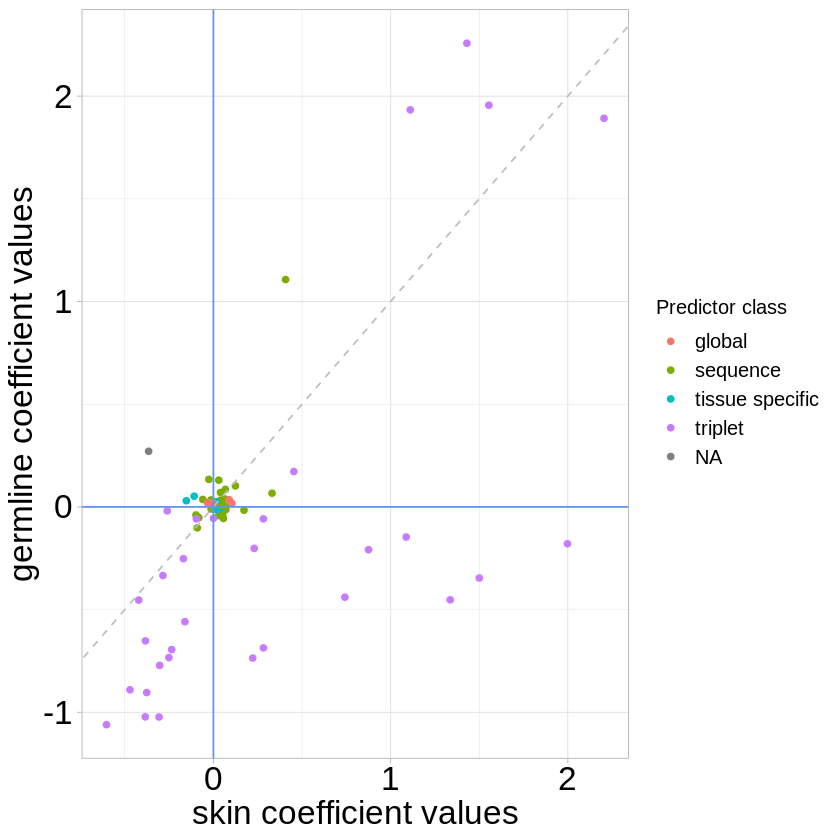

In [119]:

#plotting
ggplot(all_coefs, aes(y = tissue_est, x = tissue_predON_est)) +
    geom_point(aes(color=type) )+
    theme_light()+
#     scale_y_continuous(breaks=seq(-0.75,1.75,0.75)) +
#     scale_x_continuous(breaks=seq(-0.75,1.75,0.75)) +
    geom_abline(intercept=0, slope=1, col="grey",linetype="dashed")+ #http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
    geom_abline(intercept=0, slope=0, col="cornflowerblue")+
    geom_vline(xintercept=0,col="cornflowerblue") + #http://www.sthda.com/english/wiki/ggplot2-add-straight-lines-to-a-plot-horizontal-vertical-and-regression-lines
    labs(
        x = paste(tissue_predOn," coefficient values",sep=""),
        y = paste(tissue," coefficient values",sep=""),
        color = "Predictor class"#https://stackoverflow.com/questions/14622421/how-to-change-legend-title-in-ggplot
        ) +
    theme(
    axis.text = element_text(size = 20, family = 'Helvetica', color = 'black'),
    axis.title = element_text(size = 20, family = 'Helvetica'),
    legend.title = element_text(size=12, family = 'Helvetica'),
    legend.text = element_text(size = 12, family = 'Helvetica')
    )   
ggsave(paste(tmp_file_path,"analysis/global/plots/",model_name,"/coefScatter_",tissue,"_on_",tissue_predOn,".pdf",sep=""))




In [78]:

#writing some infor on how wel they match to file 
error_output_file = paste(tmp_file_path,"analysis/global/plots/",model_name,"/coefScatter_",tissue,"_on_",tissue_predOn,"_textOutput.txt",sep="")

MAE = mean(abs(all_coefs$tissue_est - all_coefs$tissue_predON_est))
string_to_print = paste("mean absolute error is",round(MAE,4),sep=" ")
# cat(string_to_print,file=error_output_file,sep="\n",append=TRUE)

fit<-lm(tissue_est~tissue_predON_est,data=all_coefs)
string_to_print = paste("r-squared is",summary(fit)$r.squared,sep=" ")
# cat(string_to_print,file=error_output_file,sep="\n",append=TRUE)

In [120]:
all_coefs[order(all_coefs$tissue_predON_est),]

,name,tissue_est,tissue_quant025,tissue_quant975,tissue_predON_est,tissue_predON_quant025,tissue_predON_quant975,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
74,tripletTTC,-1.060304835,-1.183291636,-0.971747656,-0.603603573,-0.654772648,-0.560118910,triplet
75,tripletTTG,-0.890490965,-0.997619689,-0.797510856,-0.470806194,-0.520785114,-0.423530790,triplet
50,tripletATC,-0.453728456,-0.553897529,-0.360823033,-0.421660906,-0.482682114,-0.365805859,triplet
76,tripletTTT,-1.022202555,-1.104124167,-0.946423347,-0.384158210,-0.428892537,-0.345781076,triplet
59,tripletCTG,-0.652262727,-0.746577642,-0.554998858,-0.383498646,-0.428229911,-0.339549447,triplet
60,tripletCTT,-0.904015001,-1.015603254,-0.820338449,-0.376490262,-0.415094311,-0.331122975,triplet
1,(Intercept),0.270802350,0.198189297,0.348125297,-0.365617713,-0.403933067,-0.327976732,NA
58,tripletCTC,-1.022811707,-1.125888182,-0.933980482,-0.306892938,-0.359373144,-0.260266483,triplet
57,tripletCTA,-0.771745064,-0.893144025,-0.668448766,-0.303287703,-0.363652862,-0.243617550,triplet


In [121]:
tissue
tissue_predOn

[1] "germline"

[1] "skin"

# **get the fold coomp plot**

In [8]:
all_coefs <- all_coefs %>% 
    mutate(fold_change = tissue_coefs/tissue_predOn_coefs)  

all_ceofs <- all_coefs[order(all_coefs$fold_change),] 

head_all_coefs <- head(all_ceofs,n=10)
tail_all_coefs <- tail(all_ceofs,n=10)
fold_plotting <- rbind(head_all_coefs,tail_all_coefs)

posNeg_log10 <- function(number) {
    if (number > 0) {
         return(log10(number))
    } else {
         return(-log10(-number))
    }
}
fold_plotting$log10_chnage <- as.numeric(lapply(fold_plotting$fold_change, posNeg_log10))



Saving 6.67 x 6.67 in image



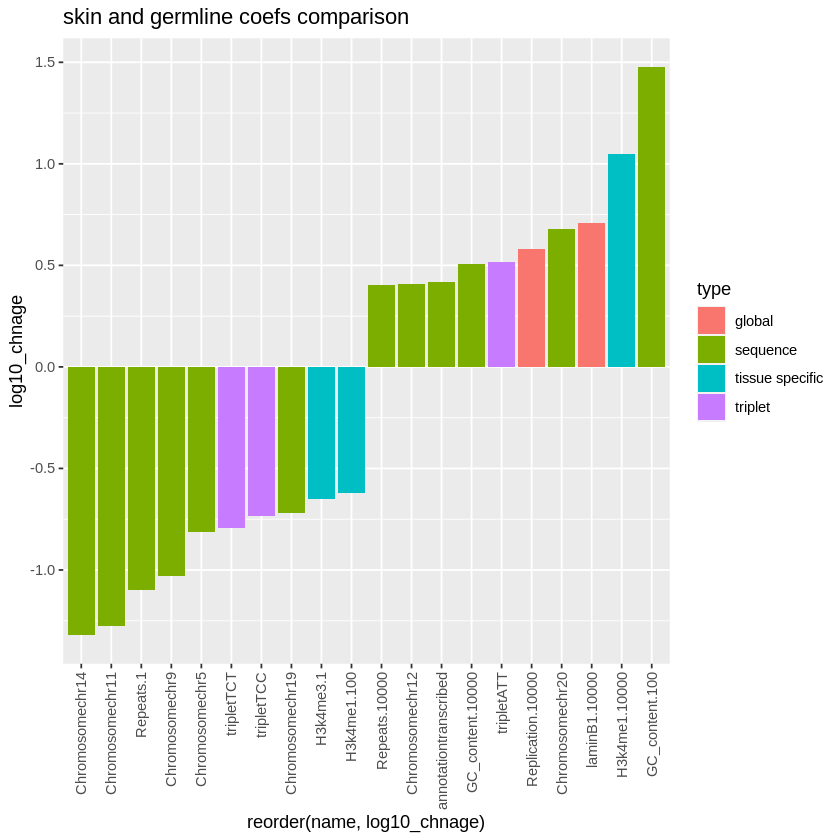

In [9]:
ggplot(data=fold_plotting,aes(x=reorder(name,log10_chnage),y=log10_chnage))+
    geom_bar(stat="identity",aes(fill=type))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+#https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2
    ggtitle(paste(tissue,"and",tissue_predOn,"coefs comparison",sep=" "))
ggsave(paste(tmp_file_path,"analysis/global/plots/",model_name,"/coefFoldChange_",tissue,"_on_",tissue_predOn,".pdf",sep=""))